
0: 640x448 1 person, 176.0ms
Speed: 5.0ms preprocess, 176.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


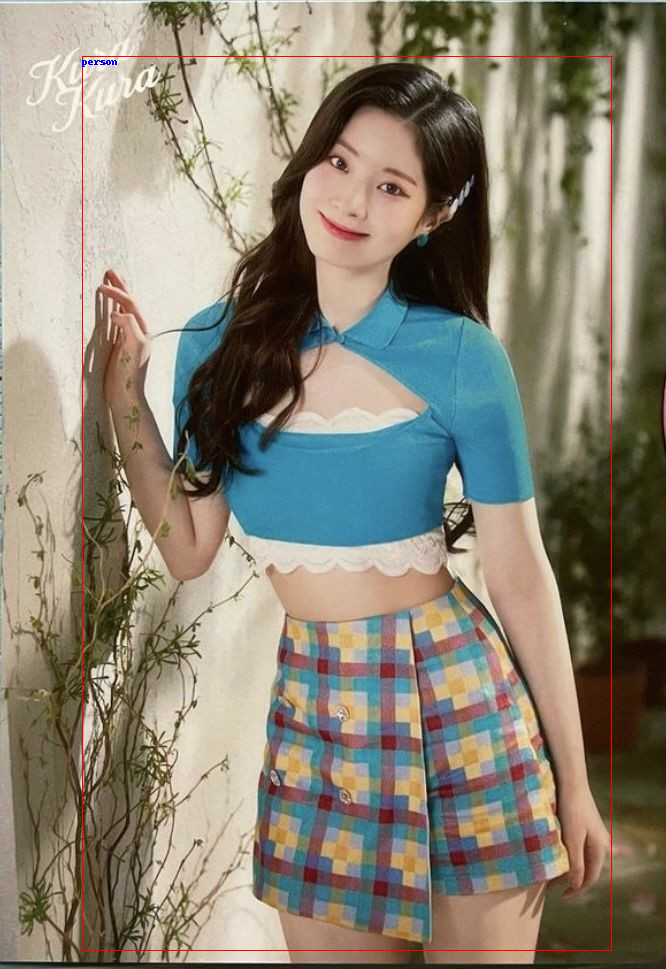

In [3]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont

# model = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')
model = YOLO("yolov8n.pt")
# model = YOLO('yolov8l.pt')

image_path = r"C:\Users\ALL USER\Desktop\Photobook\Pins\00.png"

# image_path = "/kaggle/working/new_york_city_traffic.jpg"
# image_path = "/kaggle/working/datasets/football-players-detection-1/test/images/744b27_1_10_png.rf.e6f27d3b66a0c6720b9e9e50265251a6.jpg"
img = cv2.imread(image_path)

results = model.predict(img)

# Convert OpenCV image to PIL image
pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(pil_image)
font = ImageFont.load_default()

for r in results:
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
        c = box.cls
        draw.rectangle([(b[0], b[1]), (b[2], b[3])], outline="red")
        draw.text((b[0], b[1]), model.names[int(c)], fill="blue", font=font)

# Display using Pillow
pil_image



0: 640x448 1 person, 203.0ms
Speed: 7.0ms preprocess, 203.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 448)


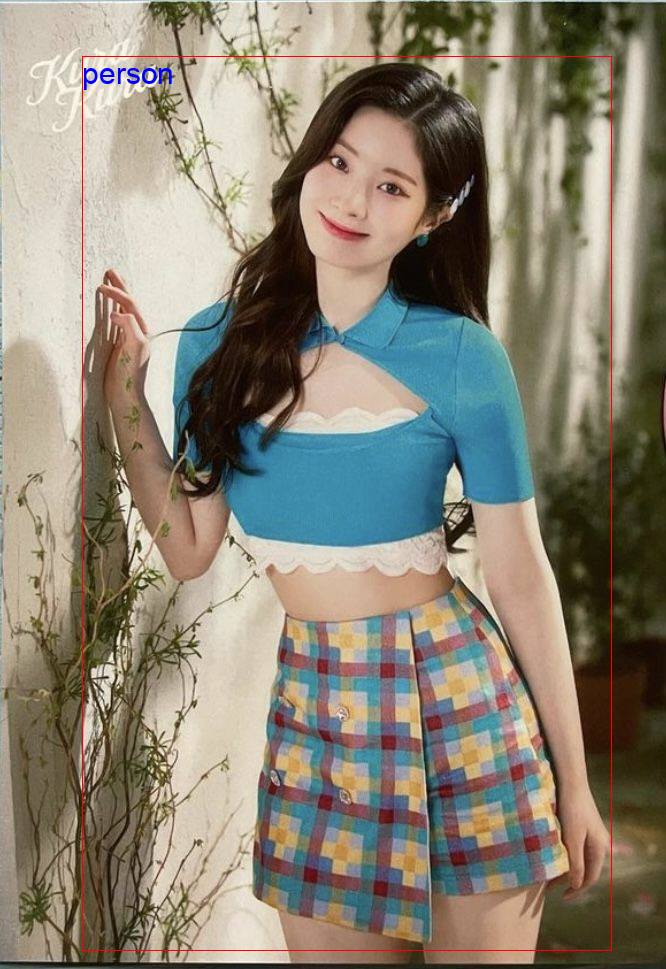

In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont

# Initialize YOLO model
model = YOLO("yolov8n.pt")

# Path to the image
image_path = r"C:\Users\ALL USER\Desktop\Photobook\Pins\00.png"
img = cv2.imread(image_path)

# Predict using YOLO model
results = model.predict(img)

# Convert OpenCV image to PIL image
pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(pil_image)

# Define font and font size
font_size = 30  # Set your desired font size
font = ImageFont.truetype("Arial.ttf", size=font_size)

# Draw bounding boxes and class names
for r in results:
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
        c = box.cls
        draw.rectangle([(b[0], b[1]), (b[2], b[3])], outline="red")
        draw.text((b[0], b[1]), model.names[int(c)], fill="blue", font=font)

# Display using Pillow
pil_image



0: 640x448 1 person, 212.0ms
Speed: 4.0ms preprocess, 212.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 448)


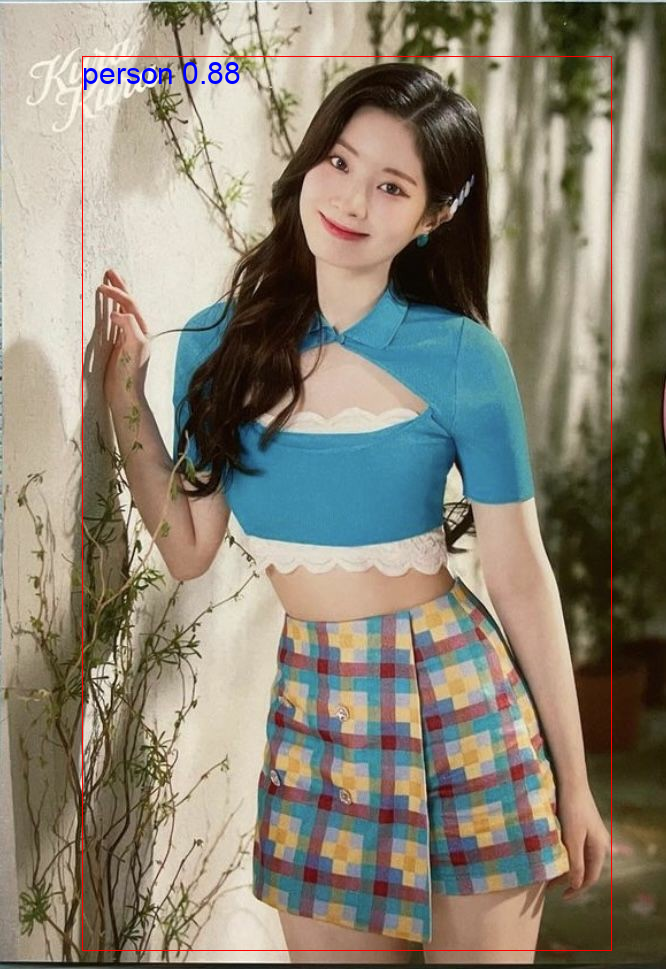

In [2]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont

# Initialize YOLO model
model = YOLO("yolov8n.pt")

# Path to the image
image_path = r"C:\Users\ALL USER\Desktop\Photobook\Pins\00.png"
img = cv2.imread(image_path)

# Predict using YOLO model
results = model.predict(img)

# Convert OpenCV image to PIL image
pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(pil_image)

# Define font and font size
font_size = 30  
font = ImageFont.truetype("Arial.ttf", size=font_size)

# Set your confidence threshold
confidence_threshold = 0.4  # Example: Keep detections with confidence above 0.4

# Draw bounding boxes and class names (with confidence threshold)
for r in results:
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0]  
        conf = box.conf.item()  # Get the confidence score as a Python float
        c = box.cls

        # Check if confidence is above the threshold
        if conf > confidence_threshold:
            draw.rectangle([(b[0], b[1]), (b[2], b[3])], outline="red")
            draw.text((b[0], b[1]), f"{model.names[int(c)]} {conf:.2f}", fill="blue", font=font)  # Display confidence

# Display using Pillow
pil_image


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np
# Initialize YOLO model
model = YOLO("yolov8n.pt")

# Path to the video
video_path = r"C:\Users\ALL USER\Downloads\Video\undefined - Imgur.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Predict using YOLO model
    results = model.predict(frame)

    # Convert OpenCV image to PIL image
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)

    # Define font and font size
    font_size = 30  # Set your desired font size
    font = ImageFont.truetype("Arial.ttf", size=font_size)

    # Draw bounding boxes and class names
    for r in results:
        boxes = r.boxes
        for box in boxes:
            b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
            c = box.cls
            draw.rectangle([(b[0], b[1]), (b[2], b[3])], outline="red")
            draw.text((b[0], b[1]), model.names[int(c)], fill="blue", font=font)

    # Convert PIL image back to OpenCV image
    frame_with_boxes = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    # Display the frame with bounding boxes
    cv2.imshow('Frame', frame_with_boxes)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np
# Initialize YOLO model
model = YOLO("yolov5n.pt")

# Path to the video
video_path = r"C:\Users\ALL USER\Downloads\Video\undefined - Imgur.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the video's frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change codec to MP4
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))  # Change output file extension to .mp4


# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Predict using YOLO model
    results = model.predict(frame)

    # Convert OpenCV image to PIL image
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)

    # Define font and font size
    font_size = 30  # Set your desired font size
    font = ImageFont.truetype("Arial.ttf", size=font_size)

    # Draw bounding boxes and class names
    for r in results:
        boxes = r.boxes
        for box in boxes:
            b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
            c = box.cls
            draw.rectangle([(b[0], b[1]), (b[2], b[3])], outline="red")
            draw.text((b[0], b[1]), model.names[int(c)], fill="blue", font=font)

    # Convert PIL image back to OpenCV image
    frame_with_boxes = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    # Write the frame with bounding boxes to the output video
    out.write(frame_with_boxes)

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


In [1]:
gmaps = googlemaps.Client(key='Add Your Key here')


NameError: name 'googlemaps' is not defined